MNIST

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.9131 - loss: 0.2879 - val_accuracy: 0.9852 - val_loss: 0.0486
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9866 - loss: 0.0432 - val_accuracy: 0.9899 - val_loss: 0.0321
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9911 - loss: 0.0301 - val_accuracy: 0.9909 - val_loss: 0.0274
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 28ms/step - accuracy: 0.9938 - loss: 0.0206 - val_accuracy: 0.9889 - val_loss: 0.0376
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9955 - loss: 0.0146 - val_accuracy: 0.9876 - val_loss: 0.0391
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9844 - loss: 0.0500
Test Accuracy: 0.9876


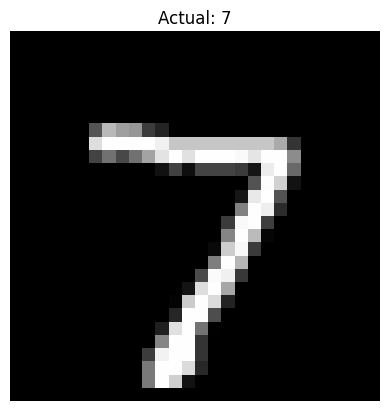

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted Digit: 7


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict example
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.title("Actual: " + str(y_test[0]))
plt.axis("off")
plt.show()

pred = model.predict(np.expand_dims(x_test[0], axis=0))
print("Predicted Digit:", np.argmax(pred))


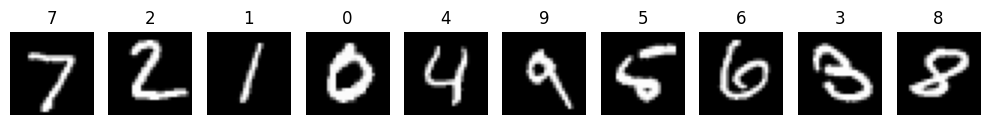

In [2]:
import matplotlib.pyplot as plt
import numpy as np

seen_digits = set()
digit_images = []

for i in range(len(y_test)):
    label = y_test[i]
    if label not in seen_digits:
        seen_digits.add(label)
        digit_images.append((x_test[i], label))
    if len(seen_digits) == 10:
        break

plt.figure(figsize=(10, 2))
for i, (img, label) in enumerate(digit_images):
    plt.subplot(1, 10, i+1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(str(label))
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
model.save("mnist_digits_cnn.keras")
